# Descenso con gradiente estocastico (Stochastic Gradient Descent SGD)

# Motivacion.
Muchos de los problemas de optimizacion se pueden escribir como una suma de funciones objetivo sobre los datos.

Ejemplos:

* El problema de minimos cuadrados (regular)
Queremos resolver el problema $Ax = y$, donde $A \in \mathbb{R}^{m \times n}$, $x \in \mathbb{R}^n$ y $y \in \mathbb{R}^m$ La funcion objetivo (de costo)

$$ C(x, A, y) = \frac12 \| Ax - y \|^2 = \frac12 \sum_{i=1}^m \left ( \sum_{j=1}^n ( a_{ij} x_j - y_i) \right )^2.$$

Vemos que la funcion objetivo es una suma de funciones objetivos sobre los datos (indice $i$). El 1/2 es solo por comodidad lo mismo que el cuadrado. De hecho la proxima tarea para usted es probare que el minimo no cambia si yo multiplico la funcion por un escalar o la elevo al cuadrado, o le saco raiz cuadrada.

Que ventaja tiene esto, que entonces podemos escribir la funcion de costo como una suma de funciones de costo "locales" (en cuanto a los datos.

$$C(x, A, y ) = \frac1m \sum_{i=1}^m C_i(x, A, y).$$

$$ C_i(x, A, y) =\frac{m}{2} \left ( \sum_{j=1}^n ( a_{ij} x_j - y_i ) \right )^2 .$$


Otro ejemplo traido de ML
**Regresion Logistica**:
La funcion de costo para regresion logistica es:

$$C(\theta, x, y ) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)} ) ] - (1 - y_i) \log [ 1 - h(\theta, x^{(i)}]  .$$
(ver Jaramillo y Rueger)
$x^{(i)}$ es una muestra de entrada $y^{(i)}$ etiqueta (salida) puede ser binaria $1,-1$, $1,0$, etc $h(\theta, x^{(i)})$ se llama **hipotesis** (esto lo explico en el curso de ML

Podemos descomponer la funcion de costo en una suma  sobre los datos asi

$$C(\theta, x, y) = \frac1m \sum_{i=1}^m C_i(\theta, x^{(i)}, y)  . \tag{1}$$
donde

$$C_i(x, \theta, y) = - \left [ y_i \log [ h(\theta, x^{(i)})] + (1  - y_i) \log [ 1 - h(\theta, x^{(i)}  \right ] .$$

Donde esta la ganancia en todo esto.

Entonces usando la Ecuacion (1) vemos, por linealidad

$$\nabla C(x, \theta, y) = \frac1m \sum_{i=1}^m \nabla C_i(x, \theta, y) .$$
A alguien se le ocurrio que solo se calcule el gradiente en una muestra (aleatoria) de las muestras $i=1,2, \cdots , m$
y nos ahorramos un factor $m$ en los computos. Pero....que tan exacto es esto?
Vamos a ver que este metodo tiene sentido.

Una grafica para medio entender que puede estar pasando.
Una caricatura.



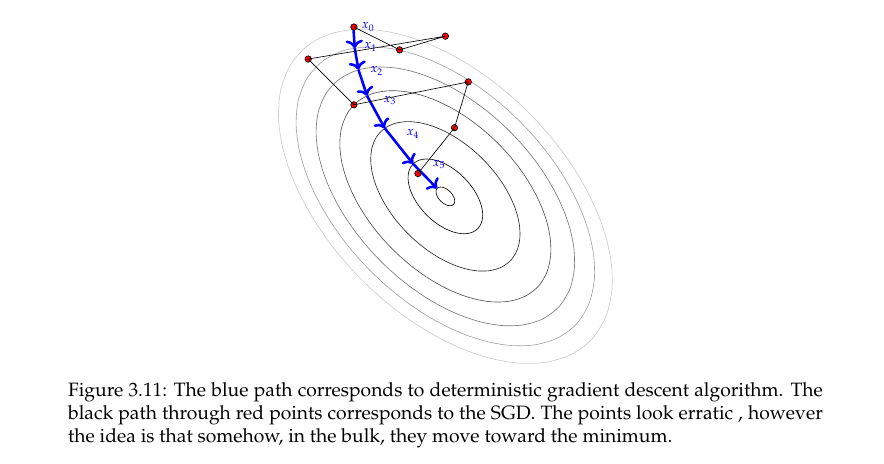

El algoritmo es:



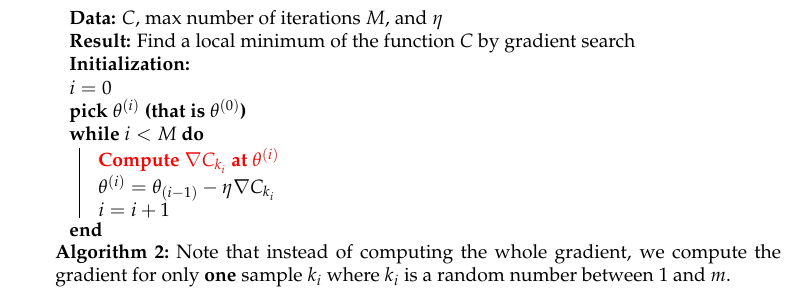

## Por que funciona el metodo de gradiente estocastico?
Con un ejemplo en 2D quiero ilustrar la idea del gradiente estocastico.

Asumamos 5 puntos en el plano,
$(x_1, y_1),
(x_2, y_2),
(x_3, y_3),
(x_4, y_4),
(x_5, y_5) $
Queremos hacer una regresion lineal con ellos donde no haya intercepto (la recta pasa por el origen).
Es decir queremos hallar el parametro $\theta$ tal que

\begin{eqnarray}
y_1 &=& \theta x_1 \\
y_2 &=& \theta x_2 \\
y_3 &=& \theta x_3 \\
y_4 &=& \theta x_4 \\
y_5 &=& \theta x_5
\end{eqnarray}

A menos que todos los puntos se encuentren sobre la recta $y=\theta x$ aca habran errores. Por lo tanto el problema llama una funcion de costo con el fin de minimizar el error.

$$ C(\theta) = \frac15 \sum_{i=1}^5 (\theta x_i - y_i)^2.$$
Ahora si identificamos la funcion de costo local

$$C_i(\theta) = (\theta x_i - y_i)^2.$$
tenemos que $C(\theta) = \frac15 \sum_{i=1}^5 C_i(\theta) $

Debemos calcular el gradiente de $C$

$$\nabla C(\theta) = \frac{d C}{d \theta} = \frac25 \sum_{i=1}^5 (\theta x_i - y_i) x_i .$$
El gradiente de cada funcion de costo local es:

$$\nabla C_i(\theta) = \frac{d C_i}{d \theta} = 2 ( \theta x_i - y_i) x_i .$$
Claramente tenemos la relacion

$$ \nabla C(\theta) = \frac15 \sum_{i=1}^5 \nabla C_i(\theta)  .$$

Cada funcion de costo $C_i(\theta)$ es una parabola
$(\theta x_i - y_i)^2 = x_i^2 \theta^2 - 2 \theta x_i y_i + y_i^2 $ (en $\theta$).

Vamos a escoger un ejemplo particular. Dados los siguientes puntos
$$(-1, -0.5), (1,1), (3,2), (4,3), (5,6) .$$

Las funciones de costo (locales) para cada uno de estos puntos son:

\begin{eqnarray}
C_1(\theta) &=& (-\theta + 0.5)^2 \quad , \quad \text{minimo en } \theta=0.5 \\
C_2(\theta) &=& (\theta + 1)^2 \quad , \quad \text{minimo en } \theta=1 \\
C_1(\theta) &=& (3 \theta -2)^2 \quad , \quad \text{minimo en } \theta=2/3 \\
C_1(\theta) &=& (4\theta + -3)^2 \quad , \quad \text{minimo en } \theta=0.75 \\
C_1(\theta) &=& (5\theta -6)^2 \quad , \quad \text{minimo en } \theta=1.2 \\
\end{eqnarray}

El gradiente de $C$ es:

$$C(\theta) = \frac15 \left [  (-\theta + 0.5)^2 + (\theta -1)^2 + (3 \theta -2)^2  + (4 \theta - 3)^2 + (5 \theta - 6)^2 \right ] .$$

Los gradientes locales
\begin{eqnarray}
\nabla C_1 (\theta) &=& -2(-\theta + 0.5) \\
\nabla C_2 (\theta) &=& 2(\theta -1) \\
\nabla C_3 (\theta) &=& 6(3 \theta -2) \\
\nabla C_4 (\theta) &=& 8(4\theta -3) \\
\nabla C_5 (\theta) &=& 10(5 \theta - 6) \\
\end{eqnarray}

No nos impmorta donde cada gradiente sea 0. Debemos escoger un $\theta$ para cada gradiente individual




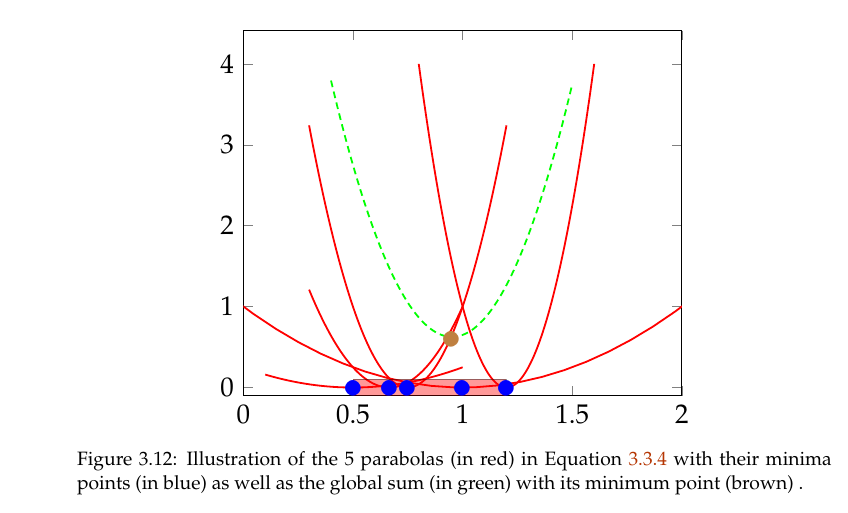

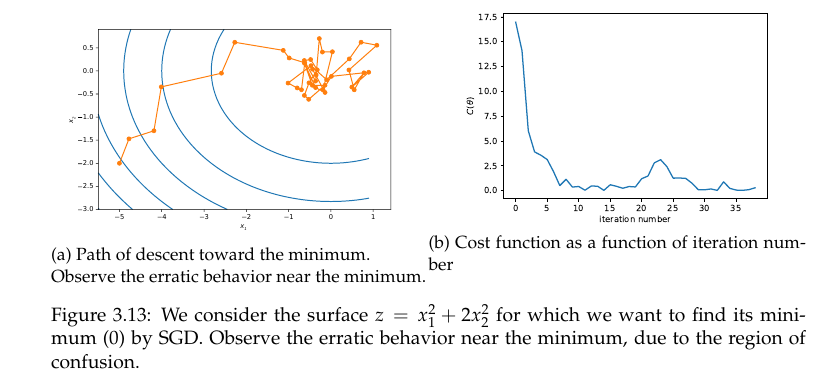